# Lead Scoring Case Study

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',500) # to view all the rows
pd.set_option('display.max_columns',500) # to view all the columns

## Step 1: Inspecting and Cleaning the Data

### Understanding the Data

In [2]:
# loading and inspecting the data
X_education = pd.read_csv("Leads.csv")
df = X_education.copy()
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# viewing the shape of the dataframe
df.shape

(9240, 37)

In [4]:
# viewing the statistical summary of the dataframe
df.describe().round(2)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [5]:
# viewing the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Performing checks and cleaning the data

In [6]:
# ensuring that the datatypes of each column are assigned accurately, 'Lead Number' should be an 
# object since it is an identification number

df["Lead Number"] = df["Lead Number"].astype(str)

In [7]:
# dropping duplicate rows, if any
df.drop_duplicates(inplace=True)

In [8]:
#Checking the null values of all the columns
df.isnull().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
# dropping columns with more than 40% null values
df.drop(["Asymmetrique Activity Index","Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score", "Lead Quality"], axis=1, inplace=True)

In [10]:
# seggregating numerical and categorical columns to do missing value imputation smoothly
Numerical = df.select_dtypes(include = (np.number)).columns
Categorical = df.select_dtypes(exclude = (np.number)).columns

In [11]:
# enumerating numerical columns
for x in Numerical:
    print(x)

Converted
TotalVisits
Total Time Spent on Website
Page Views Per Visit


In [12]:
# enumerating categorical columns
for x in Categorical:
    print(x) 

Prospect ID
Lead Number
Lead Origin
Lead Source
Do Not Email
Do Not Call
Last Activity
Country
Specialization
How did you hear about X Education
What is your current occupation
What matters most to you in choosing a course
Search
Magazine
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
Receive More Updates About Our Courses
Tags
Update me on Supply Chain Content
Get updates on DM Content
Lead Profile
City
I agree to pay the amount through cheque
A free copy of Mastering The Interview
Last Notable Activity


### Missing value treatmeant of Numerical Columns

In [13]:
# percentage of null values in each numerical column
for i in Numerical:
    print(i, (df[i].isnull().sum()/len(df)*100).round(2))

Converted 0.0
TotalVisits 1.48
Total Time Spent on Website 0.0
Page Views Per Visit 1.48


In [14]:
# we decided it would be best to drop the rows with these null values since the percentage is very less
nan_rows = df[df["TotalVisits"].isnull()]
index_nan_rows = nan_rows.index.to_list()
df.drop(index_nan_rows, axis = 0, inplace = True)

In [15]:
# confirming that numerical columns dont have any null values anymore
for i in Numerical:
    print(i, df[i].isnull().sum()/len(df)*100)

Converted 0.0
TotalVisits 0.0
Total Time Spent on Website 0.0
Page Views Per Visit 0.0


### Sanity checks on Categorical Columns

In [16]:
# viewing normalized value counts of all categorical columns to detect skewed columns and those with 
# 'Select' values

for i in Categorical:
    print((df[i].value_counts(normalize = True)*100).round(2))
    print("\n")

eb5399d9-80ff-48ba-ac06-e03421d29d6c    0.01
465a6156-4ea4-47e4-85fe-7e8afa1c916e    0.01
413fb82a-0eaa-4e44-a0f1-07276f790d4f    0.01
090e3515-80ec-4627-9764-c0341490d54a    0.01
5a94470e-dccd-46ff-a5d5-55701d014900    0.01
                                        ... 
07621eae-3aa3-4715-8349-7811372338e1    0.01
b8ec8602-59e1-4ed6-b205-3966831ae449    0.01
726565c6-64ad-40b9-a224-ef2a404c92e9    0.01
7a37f0c1-a37e-49e8-9a5c-0d0c69eb8e3d    0.01
20f04cee-213e-4850-95cb-188c45e3340f    0.01
Name: Prospect ID, Length: 9103, dtype: float64


659849    0.01
638014    0.01
634685    0.01
616146    0.01
603465    0.01
          ... 
596616    0.01
626258    0.01
586613    0.01
602292    0.01
625540    0.01
Name: Lead Number, Length: 9103, dtype: float64


Landing Page Submission    53.67
API                        39.31
Lead Add Form               6.68
Lead Import                 0.34
Name: Lead Origin, dtype: float64


Google               31.61
Direct Traffic       28.03
Olark Chat        

In [17]:
# dropping Prospect ID as it not needed because we already have 'Lead Number' as an idenfification 
# column 
df.drop(["Prospect ID"], axis=1, inplace=True)

In [18]:
# dropping highly skewed columns (>90% of the rows having same value) since columns with biased data 
# will not contibute to our model

df.drop(["Country", "Do Not Email", "Do Not Call", "What matters most to you in choosing a course", "Search", "Magazine", "Newspaper Article", "X Education Forums", 
"Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", 
"Get updates on DM Content", "I agree to pay the amount through cheque"], axis = 1, inplace = True)

In [19]:
# looking at the columns now present in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9103 non-null   object 
 1   Lead Origin                             9103 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          7672 non-null   object 
 9   How did you hear about X Education      6903 non-null   object 
 10  What is your current occupation         6420 non-null   obje

In [20]:
# according to the problem statement, many of the categorical variables have a level called 'Select' 
# which needs to be handled

# Replacing select with np.NaN everywhere in the df
df = df.replace('Select', np.NaN)

### Missing value treatment for categorical variables

In [21]:
# percentage of null values in each numerical column
Categorical = df.select_dtypes(exclude = (np.number)).columns
for i in Categorical:
    print(i, (df[i].isnull().sum()/len(df)*100).round(2))

Lead Number 0.0
Lead Origin 0.0
Lead Source 0.32
Last Activity 0.0
Specialization 36.3
How did you hear about X Education 78.15
What is your current occupation 29.47
Tags 36.61
Lead Profile 74.49
City 39.55
A free copy of Mastering The Interview 0.0
Last Notable Activity 0.0


In [22]:
# dropping columns with more than equal to 40% missing values
df.drop(["How did you hear about X Education", "Lead Profile", "City"], axis=1, inplace=True)

In [23]:
# checking % null values in columns after removing columns with > 40% missing values
Categorical = df.select_dtypes(exclude = (np.number)).columns
for i in Categorical:
    print(i, (df[i].isnull().sum()/len(df)*100).round(2))

Lead Number 0.0
Lead Origin 0.0
Lead Source 0.32
Last Activity 0.0
Specialization 36.3
What is your current occupation 29.47
Tags 36.61
A free copy of Mastering The Interview 0.0
Last Notable Activity 0.0


In [24]:
# deleting rows with less than equal to 1% missing values 
nan_rows = df[df["Lead Source"].isnull()]
index_nan_rows = nan_rows.index.to_list()
df.drop(index_nan_rows, axis = 0, inplace = True)

In [25]:
# imputing missing values of the columns with missing rows between 1% and 40%

# viewing % of missing values in "Specialization"
(df.Specialization.isnull().sum()/len(df)*100).round(2)

36.17

In [26]:
# replacing null values with the mode of the column
df['Specialization'].fillna(df.Specialization.mode()[0], inplace = True)

# viewing the mode of the column
df.Specialization.mode()[0]

'Finance Management'

In [27]:
# viewing % of missing values in "What is your current occupation"
(df["What is your current occupation"].isnull().sum()/len(df)*100).round(2)

29.57

In [28]:
# replacing null values with the mode of the column
df['What is your current occupation'].fillna(df["What is your current occupation"].mode()[0], inplace = True)

# viewing the mode of the column
df["What is your current occupation"].mode()[0]

'Unemployed'

In [29]:
# viewing % of missing values in "Tags"
(df.Tags.isnull().sum()/len(df)*100).round(2)

36.67

In [30]:
# replacing null values with the mode of the column
df['Tags'].fillna(df.Tags.mode()[0], inplace = True)

# viewing the mode of the column
df.Tags.mode()[0]

'Will revert after reading the email'

In [31]:
# making sure no dataframe column has any missing values
df.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

### Manipulating some columns to bucket < 2% values per column, so that unnecesary creation of dummy variables can be avoided

In [32]:
# viewing normalized value counts of all categorical columns to detect values that should be bucketted
for i in Categorical:
    print((df[i].value_counts(normalize = True)*100).round(2))
    print("\n")

659849    0.01
603465    0.01
658561    0.01
642784    0.01
612572    0.01
          ... 
602292    0.01
606574    0.01
589422    0.01
604323    0.01
625540    0.01
Name: Lead Number, Length: 9074, dtype: float64


Landing Page Submission    53.84
API                        39.43
Lead Add Form               6.40
Lead Import                 0.33
Name: Lead Origin, dtype: float64


Google               31.61
Direct Traffic       28.03
Olark Chat           19.32
Organic Search       12.72
Reference             4.88
Welingak Website      1.42
Referral Sites        1.38
Facebook              0.34
bing                  0.07
google                0.06
Click2call            0.04
Live Chat             0.02
Social Media          0.02
Press_Release         0.02
blog                  0.01
Pay per Click Ads     0.01
WeLearn               0.01
NC_EDM                0.01
youtubechannel        0.01
welearnblog_Home      0.01
testone               0.01
Name: Lead Source, dtype: float64


Email Opened  

In [33]:
df["Lead Source"].value_counts(normalize = True)*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Live Chat             0.022041
Social Media          0.022041
Press_Release         0.022041
blog                  0.011020
Pay per Click Ads     0.011020
WeLearn               0.011020
NC_EDM                0.011020
youtubechannel        0.011020
welearnblog_Home      0.011020
testone               0.011020
Name: Lead Source, dtype: float64

In [34]:
df["Lead Source"].value_counts()[:].index

Index(['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference',
       'Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'google',
       'Click2call', 'Live Chat', 'Social Media', 'Press_Release', 'blog',
       'Pay per Click Ads', 'WeLearn', 'NC_EDM', 'youtubechannel',
       'welearnblog_Home', 'testone'],
      dtype='object')

In [35]:
df["Lead Source"] = df["Lead Source"].replace(['Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'google',
       'Click2call', 'Live Chat', 'Social Media', 'Press_Release',
       'youtubechannel', 'Pay per Click Ads', 'blog', 'WeLearn', 'NC_EDM',
       'welearnblog_Home', 'testone'], 'Others')

df["Lead Source"].value_counts()

Google            2868
Direct Traffic    2543
Olark Chat        1753
Organic Search    1154
Reference          443
Others             313
Name: Lead Source, dtype: int64

In [36]:
df["Last Activity"].value_counts(normalize = True)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Marked Spam                0.022041
Email Received                   0.022041
Resubscribed to emails           0.011020
Visited Booth in Tradeshow       0.011020
Name: Last Activity, dtype: float64

In [37]:
df["Last Activity"].value_counts()[:].index

Index(['Email Opened', 'SMS Sent', 'Olark Chat Conversation',
       'Page Visited on Website', 'Converted to Lead', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'View in browser link Clicked', 'Approached upfront',
       'Email Marked Spam', 'Email Received', 'Resubscribed to emails',
       'Visited Booth in Tradeshow'],
      dtype='object')

In [38]:
df["Last Activity"] = df["Last Activity"].replace(['Form Submitted on Website', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront',
       'View in browser link Clicked', 'Email Received', 'Email Marked Spam',
       'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'Others')

df["Last Activity"].value_counts()

Email Opened               3432
SMS Sent                   2716
Olark Chat Conversation     972
Page Visited on Website     640
Converted to Lead           428
Email Bounced               312
Others                      307
Email Link Clicked          267
Name: Last Activity, dtype: int64

In [39]:
df["Specialization"].value_counts(normalize = True)*100

Finance Management                   46.737933
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Travel and Tourism                    2.226141
Media and Advertising                 2.226141
International Business                1.939608
Healthcare Management                 1.719198
E-COMMERCE                            1.223275
Hospitality Management                1.223275
Retail Management                     1.102050
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: Specialization, dtype: float64

In [40]:
df["Specialization"].value_counts()[:].index

Index(['Finance Management', 'Human Resource Management',
       'Marketing Management', 'Operations Management',
       'Business Administration', 'IT Projects Management',
       'Supply Chain Management', 'Banking, Investment And Insurance',
       'Travel and Tourism', 'Media and Advertising', 'International Business',
       'Healthcare Management', 'E-COMMERCE', 'Hospitality Management',
       'Retail Management', 'Rural and Agribusiness', 'E-Business',
       'Services Excellence'],
      dtype='object')

In [41]:
df["Specialization"] = df["Specialization"].replace(['International Business',
       'Healthcare Management', 'E-COMMERCE', 'Hospitality Management',
       'Retail Management', 'Rural and Agribusiness', 'E-Business',
       'Services Excellence'], 'Others')

df["Specialization"].value_counts()

Finance Management                   4241
Human Resource Management             837
Others                                824
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
Name: Specialization, dtype: int64

In [42]:
df["Tags"].value_counts(normalize = True)*100

Will revert after reading the email                  58.882521
Ringing                                              13.081331
Interested in other courses                           5.609434
Already a student                                     5.124532
Closed by Horizzon                                    3.317170
switched off                                          2.644920
Busy                                                  2.038792
Lost to EINS                                          1.895526
Not doing further education                           1.597972
Interested  in full time MBA                          1.278378
Graduation in progress                                1.223275
invalid number                                        0.914701
Diploma holder (Not Eligible)                         0.694291
wrong number given                                    0.517963
opp hangup                                            0.363676
number not provided                                   0

In [43]:
df["Tags"].value_counts()[:].index

Index(['Will revert after reading the email', 'Ringing',
       'Interested in other courses', 'Already a student',
       'Closed by Horizzon', 'switched off', 'Busy', 'Lost to EINS',
       'Not doing further education', 'Interested  in full time MBA',
       'Graduation in progress', 'invalid number',
       'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
       'number not provided', 'in touch with EINS', 'Lost to Others',
       'Want to take admission but has financial problems', 'Still Thinking',
       'Interested in Next batch', 'In confusion whether part time or DLP',
       'Lateral student', 'University not recognized',
       'Shall take in the next coming month',
       'Recognition issue (DEC approval)'],
      dtype='object')

In [44]:
df["Tags"] = df["Tags"].replace(['Lost to EINS',
       'Not doing further education', 'Interested  in full time MBA',
       'Graduation in progress', 'invalid number',
       'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
       'number not provided', 'in touch with EINS', 'Lost to Others',
       'Still Thinking', 'In confusion whether part time or DLP',
       'Want to take admission but has financial problems',
       'Interested in Next batch', 'Lateral student',
       'University not recognized', 'Shall take in the next coming month',
       'Recognition issue (DEC approval)'], 'Others')

df["Tags"].value_counts()

Will revert after reading the email    5343
Ringing                                1187
Others                                  844
Interested in other courses             509
Already a student                       465
Closed by Horizzon                      301
switched off                            240
Busy                                    185
Name: Tags, dtype: int64

In [45]:
df['Last Notable Activity'].value_counts(normalize = True)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
View in browser link Clicked     0.011020
Approached upfront               0.011020
Email Received                   0.011020
Form Submitted on Website        0.011020
Resubscribed to emails           0.011020
Name: Last Notable Activity, dtype: float64

In [46]:
df['Last Notable Activity'].value_counts()[:].index

Index(['Modified', 'Email Opened', 'SMS Sent', 'Page Visited on Website',
       'Olark Chat Conversation', 'Email Link Clicked', 'Email Bounced',
       'Unsubscribed', 'Unreachable', 'Had a Phone Conversation',
       'Email Marked Spam', 'View in browser link Clicked',
       'Approached upfront', 'Email Received', 'Form Submitted on Website',
       'Resubscribed to emails'],
      dtype='object')

In [47]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Link Clicked', 'Email Bounced',
       'Unsubscribed', 'Unreachable', 'Had a Phone Conversation',
       'Email Marked Spam', 'Email Received', 'Approached upfront',
       'Resubscribed to emails', 'Form Submitted on Website',
       'View in browser link Clicked'], 'Others')

df['Last Notable Activity'].value_counts()

Modified                   3267
Email Opened               2823
SMS Sent                   2152
Others                      331
Page Visited on Website     318
Olark Chat Conversation     183
Name: Last Notable Activity, dtype: int64

### Outlier Detection and Treatment

In [48]:
# listing down all numerical variables to perform outlier treatment
for i in Numerical:
    print(i, df[i].isnull().sum()/len(df)*100)

Converted 0.0
TotalVisits 0.0
Total Time Spent on Website 0.0
Page Views Per Visit 0.0


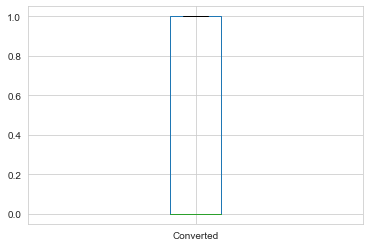

In [49]:
# setting style for boxplot
sns.set_style("whitegrid")

# checking if the column "Converted" has any outliers
df.boxplot("Converted")
plt.show()

# there are no outliers in this column since it has only 0 and 1 as its values

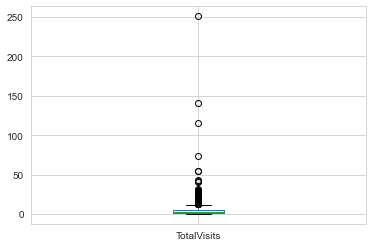

In [50]:
# checking if the column "TotalVisits" has any outliers
df.boxplot("TotalVisits")
plt.show()

In [51]:
# the boxplot above shows us that a lot of outliers are present in the column

# we decided to cap the outliers at 99th percentile
df.TotalVisits.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     3.0
0.70     4.0
0.90     7.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

In [52]:
#We finally decided to cap the outliers at 99th percentile
df = df[df.TotalVisits < 17]

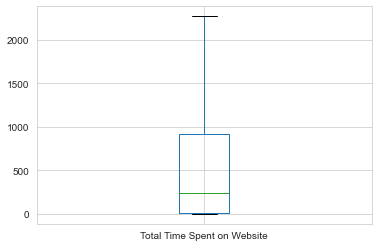

In [53]:
# checking if the column "TotalVisits" has any outliers
df.boxplot("Total Time Spent on Website")
plt.show()

# there are no outliers in this column

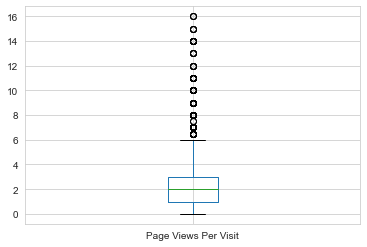

In [54]:
# checking if the column "TotalVisits" has any outliers
df.boxplot("Page Views Per Visit")
plt.show()

# the outliers seem like they are continuous values so we decided not to cap them

### Checking the % of retained rows

In [55]:
print(round(((len(df)/len(X_education))*100), 2), "%")

97.13 %


### Exploratory Data Analysis

In [56]:
# finding the imbalance percentage
(df.Converted.value_counts(normalize=True)*100).round()

0    62.0
1    38.0
Name: Converted, dtype: float64

<AxesSubplot:>

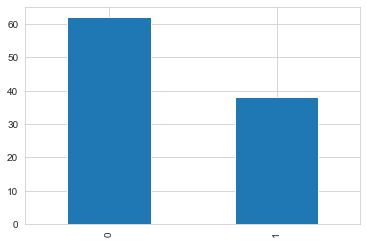

In [57]:
# plot title, labels, etc!

(df.Converted.value_counts(normalize=True)*100).round().plot.bar()

### Bivariate Analysis

#### BOX PLOT

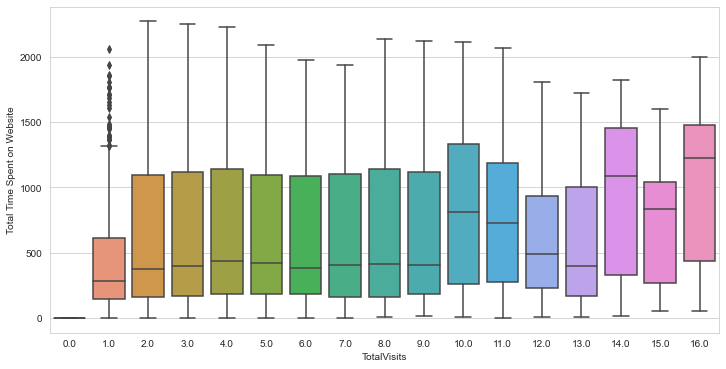

In [58]:
plt.figure(figsize=[12,6])
sns.boxplot(x="TotalVisits",y="Total Time Spent on Website",data=df)
plt.show()

#### SCATTER PLOT:

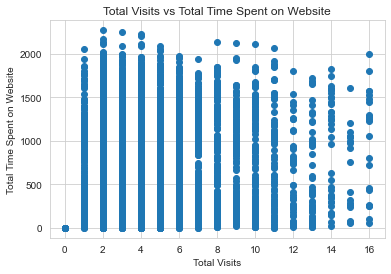

In [59]:
# Plot 1:
# Total visits vs Total time spent on website
plt.title("Total Visits vs Total Time Spent on Website")
plt.xlabel("Total Visits")
plt.ylabel("Total Time Spent on Website")
plt.scatter(df['TotalVisits'], df['Total Time Spent on Website'])
plt.show()

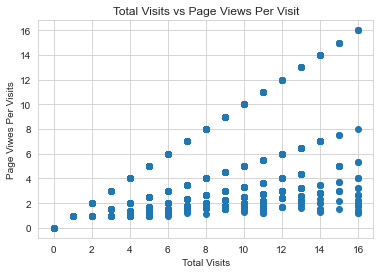

In [60]:
# Plot 2:
# Total visits vs Page views per visit
plt.title("Total Visits vs Page Views Per Visit")
plt.xlabel("Total Visits")
plt.ylabel("Page Viwes Per Visits")
plt.scatter(df['TotalVisits'],df['Page Views Per Visit'])
plt.show()

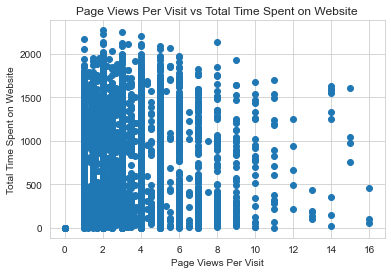

In [61]:
# Plot 3:
# Page views per visit vs Total time spent on website
plt.title("Page Views Per Visit vs Total Time Spent on Website")
plt.xlabel("Page Views Per Visit")
plt.ylabel("Total Time Spent on Website")
plt.scatter(df['Page Views Per Visit'], df['Total Time Spent on Website'])
plt.show()

#### IMPACT OF THE CATEGORICAL VARIABLES ON 'CONVERTED':

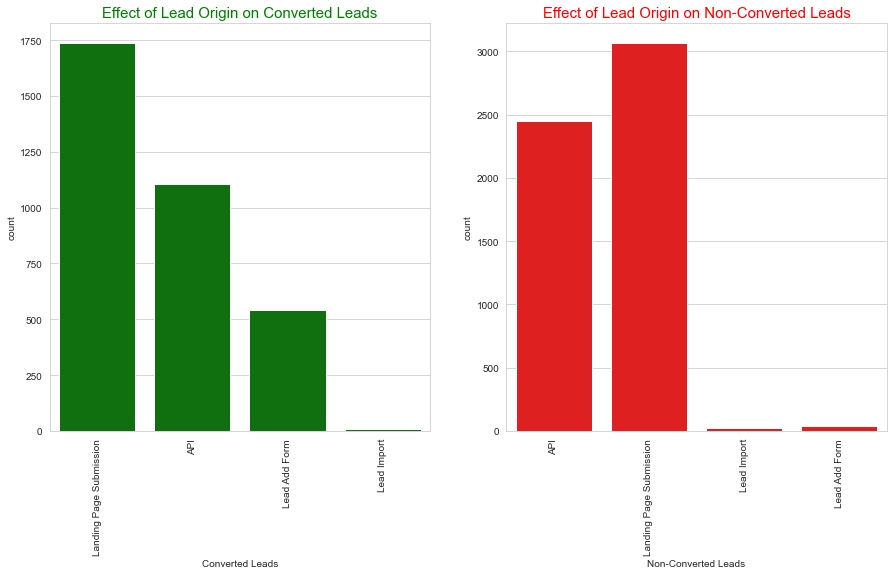

In [62]:
# We will visualize the impact of each categorical variable on the target variable:
# lead origin

colname = 'Lead Origin'
plt.figure(figsize=(15,7.5))

df1 = df[df["Converted"] == 1]
df0 = df[df["Converted"] == 0]

plt.subplot(1,2,1)
plt.title("Effect of " + colname + " on Converted Leads", color="green", size=15)
plt.xticks(rotation = 90)
sns.countplot(colname,data=df1,color="green")
plt.xlabel("Converted Leads");

plt.subplot(1,2,2)
plt.title("Effect of " + colname + " on Non-Converted Leads", color="red", size=15)
plt.xticks(rotation = 90)
sns.countplot(colname, data=df0, color="red")
plt.xlabel("Non-Converted Leads");

##### The highest percentage of conversion can be seen for lead origin in 'Lead Add Form'

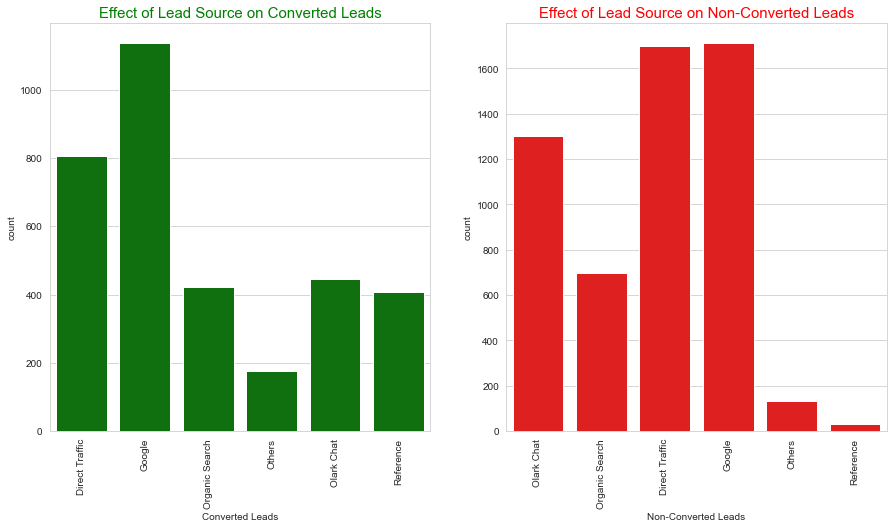

In [63]:
#lead_source
colName = 'Lead Source'
plt.figure(figsize=(15,7.5))

df1 = df[df["Converted"] == 1]
df0 = df[df["Converted"] == 0]

plt.subplot(1,2,1)
plt.title("Effect of " + colName + " on Converted Leads", color="green", size=15)
plt.xticks(rotation = 90)
sns.countplot(colName,data=df1,color="green")
plt.xlabel("Converted Leads");

plt.subplot(1,2,2)
plt.title("Effect of " + colName + " on Non-Converted Leads", color="red", size=15)
plt.xticks(rotation = 90)
sns.countplot(colName, data=df0, color="red")
plt.xlabel("Non-Converted Leads");

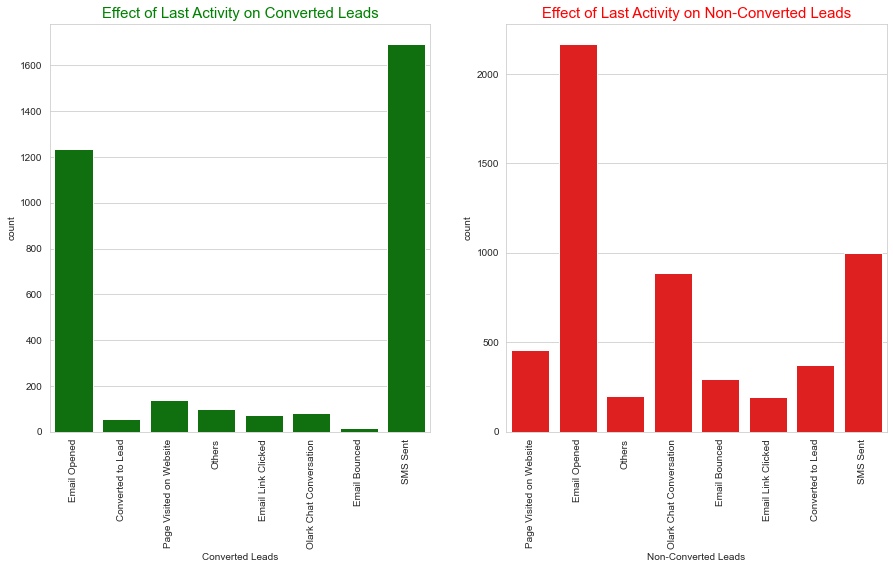

In [64]:
#last activity
colName = 'Last Activity'
plt.figure(figsize=(15,7.5))

df1 = df[df["Converted"] == 1]
df0 = df[df["Converted"] == 0]

plt.subplot(1,2,1)
plt.title("Effect of " + colName + " on Converted Leads", color="green", size=15)
plt.xticks(rotation = 90)
sns.countplot(colName,data=df1,color="green")
plt.xlabel("Converted Leads");

plt.subplot(1,2,2)
plt.title("Effect of " + colName + " on Non-Converted Leads", color="red", size=15)
plt.xticks(rotation = 90)
sns.countplot(colName, data=df0, color="red")
plt.xlabel("Non-Converted Leads");

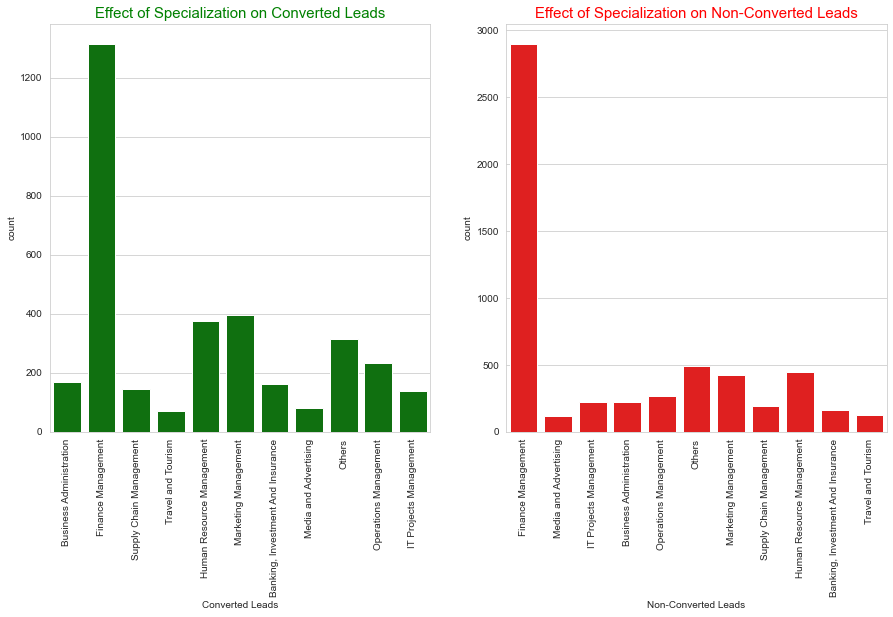

In [65]:
# lead_origin
colName = 'Specialization'
plt.figure(figsize=(15,7.5))

df1 = df[df["Converted"] == 1]
df0 = df[df["Converted"] == 0]

plt.subplot(1,2,1)
plt.title("Effect of " + colName + " on Converted Leads", color="green", size=15)
plt.xticks(rotation = 90)
sns.countplot(colName,data=df1,color="green")
plt.xlabel("Converted Leads");

plt.subplot(1,2,2)
plt.title("Effect of " + colName + " on Non-Converted Leads", color="red", size=15)
plt.xticks(rotation = 90)
sns.countplot(colName, data=df0, color="red")
plt.xlabel("Non-Converted Leads");

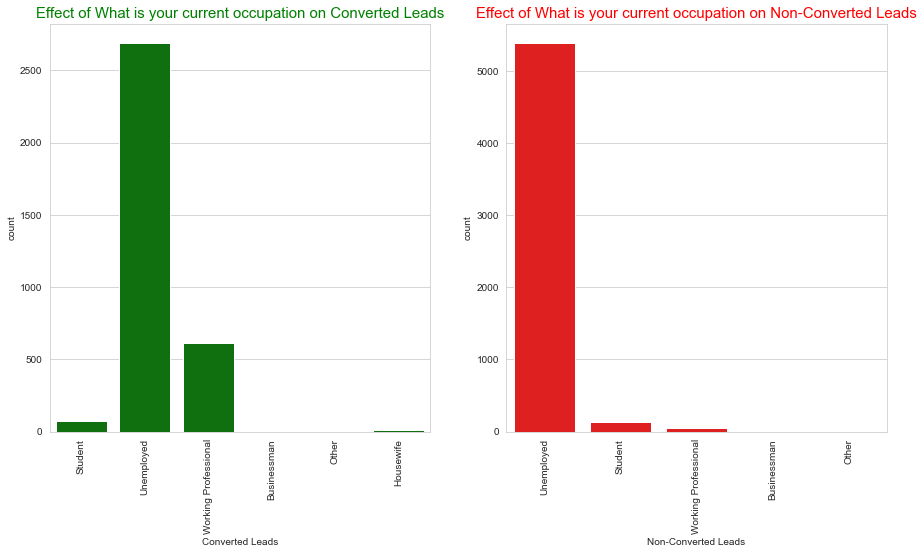

In [66]:
# lead_origin
colName = 'What is your current occupation'
plt.figure(figsize=(15,7.5))

df1 = df[df["Converted"] == 1]
df0 = df[df["Converted"] == 0]

plt.subplot(1,2,1)
plt.title("Effect of " + colName + " on Converted Leads", color="green", size=15)
plt.xticks(rotation = 90)
sns.countplot(colName,data=df1,color="green")
plt.xlabel("Converted Leads");

plt.subplot(1,2,2)
plt.title("Effect of " + colName + " on Non-Converted Leads", color="red", size=15)
plt.xticks(rotation = 90)
sns.countplot(colName, data=df0, color="red")
plt.xlabel("Non-Converted Leads");

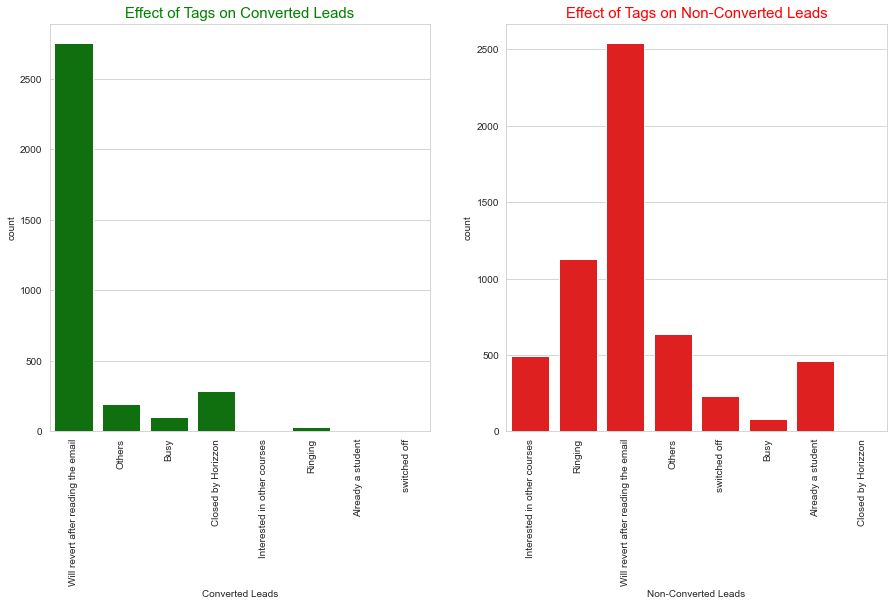

In [67]:
# lead_origin
colName = 'Tags'
plt.figure(figsize=(15,7.5))

df1 = df[df["Converted"] == 1]
df0 = df[df["Converted"] == 0]

plt.subplot(1,2,1)
plt.title("Effect of " + colName + " on Converted Leads", color="green", size=15)
plt.xticks(rotation = 90)
sns.countplot(colName,data=df1,color="green")
plt.xlabel("Converted Leads");

plt.subplot(1,2,2)
plt.title("Effect of " + colName + " on Non-Converted Leads", color="red", size=15)
plt.xticks(rotation = 90)
sns.countplot(colName, data=df0, color="red")
plt.xlabel("Non-Converted Leads");

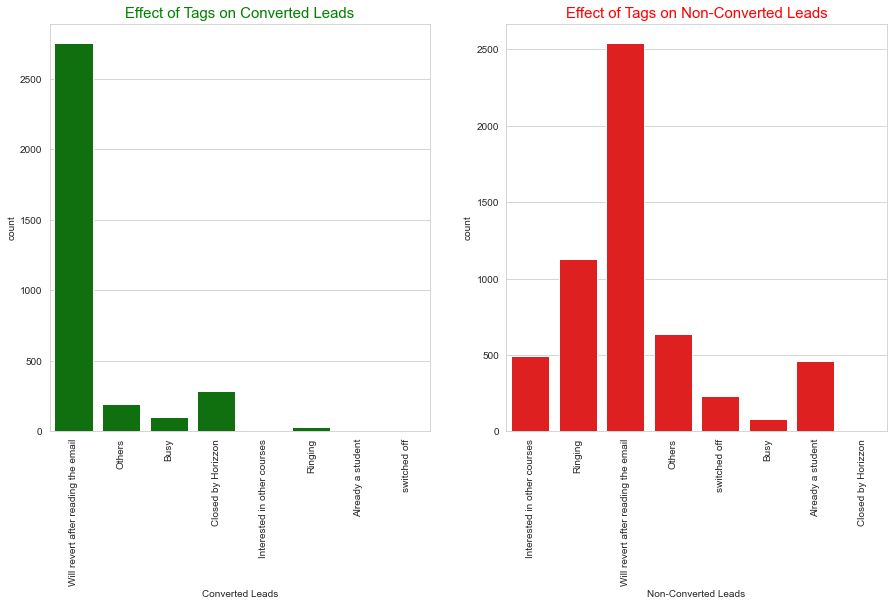

In [68]:
# lead_origin
plt.figure(figsize=(15,7.5))

df1 = df[df["Converted"] == 1]
df0 = df[df["Converted"] == 0]

plt.subplot(1,2,1)
plt.title("Effect of " + colName + " on Converted Leads", color="green", size=15)
plt.xticks(rotation = 90)
sns.countplot(colName,data=df1,color="green")
plt.xlabel("Converted Leads");

plt.subplot(1,2,2)
plt.title("Effect of " + colName + " on Non-Converted Leads", color="red", size=15)
plt.xticks(rotation = 90)
sns.countplot(colName, data=df0, color="red")
plt.xlabel("Non-Converted Leads");

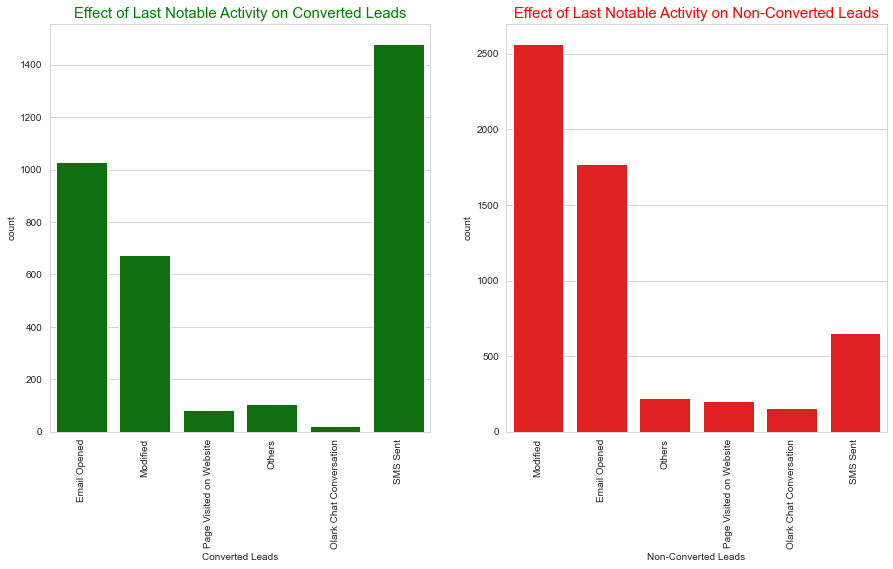

In [69]:
# lead_origin
colName = 'Last Notable Activity'
plt.figure(figsize=(15,7.5))

df1 = df[df["Converted"] == 1]
df0 = df[df["Converted"] == 0]

plt.subplot(1,2,1)
plt.title("Effect of " + colName + " on Converted Leads", color="green", size=15)
plt.xticks(rotation = 90)
sns.countplot(colName,data=df1,color="green")
plt.xlabel("Converted Leads");

plt.subplot(1,2,2)
plt.title("Effect of " + colName + " on Non-Converted Leads", color="red", size=15)
plt.xticks(rotation = 90)
sns.countplot(colName, data=df0, color="red")
plt.xlabel("Non-Converted Leads");

#### DISTPLOT:

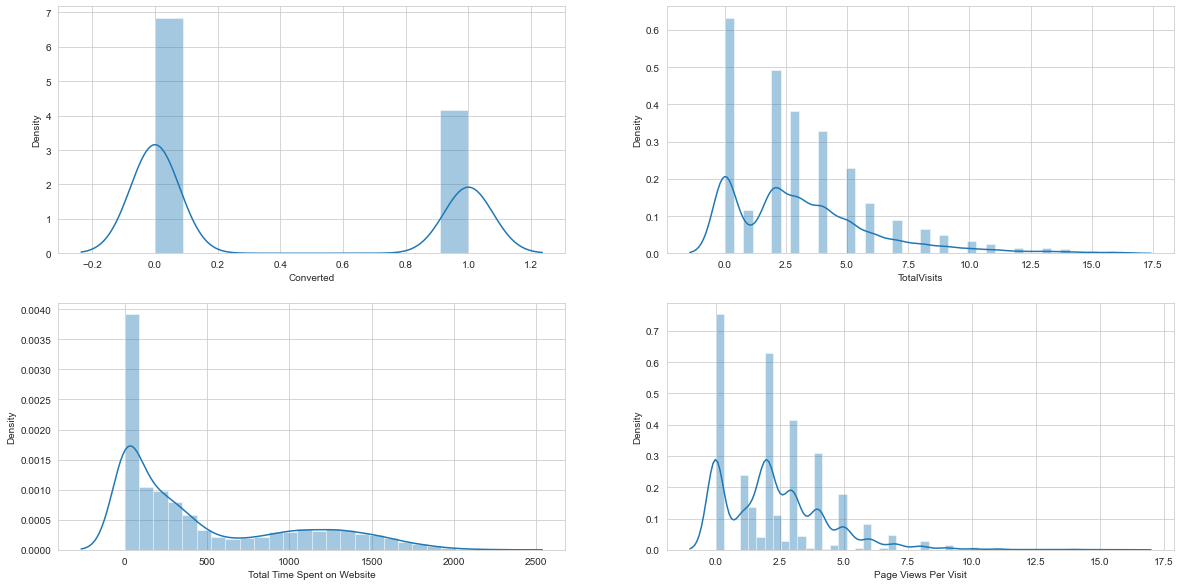

In [70]:
# Visualizing numeric variables
plt.figure(figsize=(20,10))
for i in range(0, len(Numerical)) :
    plt.subplot(2,2,i+1) 
    sns.distplot(df[Numerical[i]])
plt.show()

### Multivariate Analysis

#### PAIR PLOT:

<Figure size 1440x720 with 0 Axes>

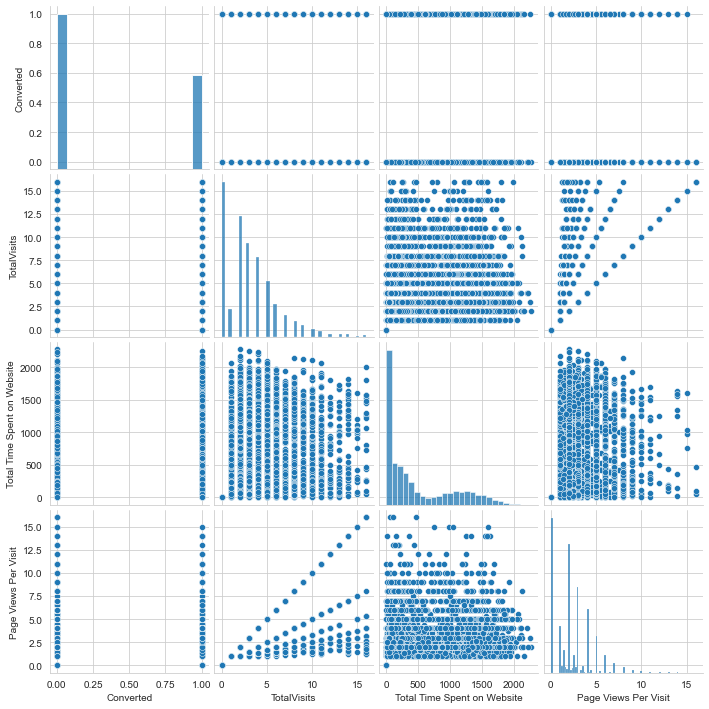

In [71]:
plt.figure(figsize=(20,10))
sns.pairplot(df[Numerical])
plt.show()

#### HEAT MAP:

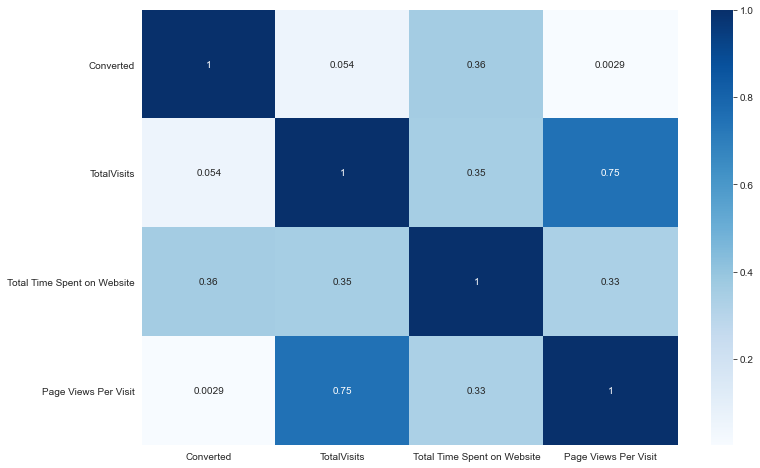

In [72]:
# Viewing the heatmap
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), cmap = "Blues" ,annot = True)
plt.show()

In [73]:
# dropping 'Page Views Per Visit' as it has extreme correlation with two other variables and not much 
# with target variable
df = df.drop(['Page Views Per Visit'], 1)

## Getting rid of sales team generated data

In [74]:
# some of the columns represent data that has been geenrated by the sales team, when our ML model will 
# be put into use it will be used on the data coming from customer-filled form and so sales team data 
# will not be available to the model

# hence it is decided to drop the columns which have been generated by the sales team, before model 
# building 
# these columns are - "Tags", "Lead Quality", "Asymmetrique Activity Index","Asymmetrique Profile Index", 
# "Asymmetrique Activity Score", "Asymmetrique Profile Score", "Last Activity", 
# "Last Notable Activity", "Lead Profile"
# out of these we still have a few columns left which we will now drop

df.drop(["Tags", "Last Activity", "Last Notable Activity"], axis = 1, inplace = True)

## Step 2: Handling categorical variables

### Converting binary variables having Yes/No to 1/0

In [75]:
# converting "A free copy of Mastering The Interview" to a numerical variable
df["A free copy of Mastering The Interview"] = df["A free copy of Mastering The Interview"].replace({"Yes":1, "No":0})

# checking if ther conversion has worked
df["A free copy of Mastering The Interview"].value_counts()

0    6148
1    2827
Name: A free copy of Mastering The Interview, dtype: int64

### Creating dummy features (one-hot encoding) for categorical variables with multiple levels 

In [76]:
# viewing the value counts
df["Lead Origin"].value_counts(normalize = True)*100

Landing Page Submission    53.559889
API                        39.643454
Lead Add Form               6.462396
Lead Import                 0.334262
Name: Lead Origin, dtype: float64

In [77]:
# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(df['Lead Origin'], prefix='Lead Origin')

# Dropping one column since didnt apply (drop_first=True)
lo = lo.drop(['Lead Origin_Lead Import'], axis =1)

#Adding the results to the master dataframe
df = pd.concat([df,lo], axis=1)

In [78]:
# viewing the value counts of the next column
df["Lead Source"].value_counts(normalize = True)*100

Google            31.743733
Direct Traffic    27.910864
Olark Chat        19.487465
Organic Search    12.479109
Reference          4.924791
Others             3.454039
Name: Lead Source, dtype: float64

In [79]:
# Creating dummy variables for the next column
ls = pd.get_dummies(df['Lead Source'], prefix='Lead Source')

# # Dropping one column since didnt apply (drop_first=True)
ls = ls.drop(['Lead Source_Others'], axis =1)

# #Adding the results to the master dataframe
df = pd.concat([df,ls], axis=1)

In [80]:
# viewing the value counts of the next column
df["Specialization"].value_counts(normalize = True)*100

Finance Management                   46.997214
Human Resource Management             9.136490
Marketing Management                  9.091922
Others                                8.958217
Operations Management                 5.537604
Business Administration               4.378830
IT Projects Management                4.033426
Supply Chain Management               3.810585
Banking, Investment And Insurance     3.643454
Media and Advertising                 2.217270
Travel and Tourism                    2.194986
Name: Specialization, dtype: float64

In [81]:
# Creating dummy variables for the next column
sp = pd.get_dummies(df['Specialization'], prefix='Specialization')

# # Dropping one column since didnt apply (drop_first=True)
sp = sp.drop(['Specialization_Others'], axis =1)

# #Adding the results to the master dataframe
df = pd.concat([df,sp], axis=1)

In [82]:
# viewing the value counts of the next column
df['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              89.916435
Working Professional     7.465181
Student                  2.284123
Other                    0.144847
Housewife                0.100279
Businessman              0.089136
Name: What is your current occupation, dtype: float64

In [83]:
# Creating dummy variables for the next column
wh = pd.get_dummies(df['What is your current occupation'], prefix='What is your current occupation')

# # Dropping one column since didnt apply (drop_first=True)
wh = wh.drop(['What is your current occupation_Businessman'], axis =1)

# #Adding the results to the master dataframe
wh = pd.concat([df,wh], axis=1)

In [84]:
df['A free copy of Mastering The Interview'].value_counts(normalize = True)*100

0    68.501393
1    31.498607
Name: A free copy of Mastering The Interview, dtype: float64

In [85]:
# Creating dummy variables for the next variable
af = pd.get_dummies(df['A free copy of Mastering The Interview'], prefix='A free copy of Mastering The Interview')

# # Dropping one column since didnt apply (drop_first=True)
af = af.drop(['A free copy of Mastering The Interview_1'], axis =1)

#Adding the results to the master dataframe
af = pd.concat([df,af], axis=1)

#### Dropping the variables whose dummies have been created

In [86]:
# since we have created the dummy variables, we will now delete all categorical columns
df.drop(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview'], axis = 1, inplace = True)

In [87]:
# ensuring necessary columns have been converted into numerical datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8975 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Lead Number                                       8975 non-null   object 
 1   Converted                                         8975 non-null   int64  
 2   TotalVisits                                       8975 non-null   float64
 3   Total Time Spent on Website                       8975 non-null   int64  
 4   Lead Origin_API                                   8975 non-null   uint8  
 5   Lead Origin_Landing Page Submission               8975 non-null   uint8  
 6   Lead Origin_Lead Add Form                         8975 non-null   uint8  
 7   Lead Source_Direct Traffic                        8975 non-null   uint8  
 8   Lead Source_Google                                8975 non-null   uint8  
 9   Lead Source_Olark C

In [88]:
# viewing the head of the df
df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,660737,0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,660727,1,2.0,1532,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,660681,1,2.0,1428,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


## Step 3: Test - Train Split

In [89]:
# Storing feature variables in X
X = df.drop(['Converted','Lead Number'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,2.0,1532,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.0,305,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2.0,1428,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [90]:
# Storing target variable in y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [91]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

## Step 4 : Feature Scaling

In [92]:
# choosing variables for feature scaling by identifying columns with max value != 1
X.describe()

,TotalVisits,Total Time Spent on Website,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000,8975.000000
mean,3.192535,481.180724,0.396435,0.535599,0.064624,0.279109,0.317437,0.194875,0.124791,0.049248,0.036435,0.043788,0.469972,0.091365,0.040334,0.090919,0.022173,0.055376,0.038106,0.021950
std,2.934948,545.041857,0.489184,0.498759,0.245875,0.448586,0.465505,0.396126,0.330500,0.216397,0.187379,0.204635,0.499125,0.288143,0.196753,0.287510,0.147253,0.228726,0.191462,0.146528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,244.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,919.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,2272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism
892,0.965577,2.726491,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1819,-0.062633,0.670274,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4806,0.622840,-0.490818,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
8535,-0.062633,-0.842998,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
7842,0.965577,2.078994,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Checking the old conversion rate

In [94]:
conversion_rate = round(((sum(df['Converted'])/len(df['Converted'].index))*100),2)
print(conversion_rate, "%")

37.85 %


## Step 5: Model Building

In [95]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial()) 
#calling the function

logm1.fit().summary() #fitting the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6282
Model:                            GLM   Df Residuals:                     6261
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3143.9
Date:                Mon, 17 May 2021   Deviance:                       6287.8
Time:                        21:38:29   Pearson chi2:                 6.34e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.7410      0.460      1.609      0.108      -0.161       1.644
TotalVisits                                          0.1753      0.040      4.372      0.000       0.097       0.254
Total Time Spent on Website                          1.1305      0.037     30.399      0.000       1.058       1.203
Lead Origin_API                                     -2.0077      0.532     -3.773      0.000      -3.051      -0.965
Lead Origin_Landing Page Submission                 -2.3716      0.537     -4.416      0.000      -3.424      -1.319
Lead Origin_Lead Add Form                            4.2206      0.739      5.715      0.000       2.773       5.668
Lead Source_Direct Traffic                           0.3405      0.291      1.170      0.242      -0.230       0.911
Lead Source_Google                                   0.6609      0.284      2.328      0.020       0.104       1.217
Lead Source_Olark Chat                               1.6493      0.296      5.568      0.000       1.069       2.230
Lead Source_Organic Search                           0.5149      0.291      1.767      0.077      -0.056       1.086
Lead Source_Reference                               -1.2870      0.626     -2.054      0.040      -2.515      -0.059
Specialization_Banking, Investment And Insurance     0.2315      0.190      1.217      0.223      -0.141       0.604
Specialization_Business Administration               0.2613      0.178      1.467      0.142      -0.088       0.611
Specialization_Finance Management                   -0.4841      0.126     -3.827      0.000      -0.732      -0.236
Specialization_Human Resource Management             0.1517      0.145      1.047      0.295      -0.132       0.436
Specialization_IT Projects Management                0.1611      0.185      0.869      0.385      -0.202       0.525
Specialization_Marketing Management                  0.3101      0.146      2.130      0.033       0.025       0.595
Specialization_Media and Advertising                 0.2250      0.218      1.031      0.303      -0.203       0.653
Specialization_Operations Management                 0.3389      0.162      2.091      0.036       0.021       0.656
Specialization_Supply Chain Management               0.2153      0.186      1.160      0.246      -0.148       0.579
Specialization_Travel and Tourism                   -0.4190      0.244     -1.717      0.086      -0.897       0.059
====================================================================================================================
"""

### Feature Selection Using RFE

In [96]:
# using RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 20) 
rfe = rfe.fit(X_train, y_train)

In [97]:
# viewing the ranking of rfe columns
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_IT Projects Management', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Media and Advertising', True, 1),
 ('Specialization_Operations Management', True, 1),
 ('Specialization_Supply Chain Management', True, 1),
 ('Specialization_Travel and Tourism', True, 1)]

In [98]:
col = X_train.columns[rfe.support_]

In [99]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

##### Assessing the model with StatsModels

In [100]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()) #calling the function
res = logm2.fit() #fitting the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6282
Model:                            GLM   Df Residuals:                     6261
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3143.9
Date:                Mon, 17 May 2021   Deviance:                       6287.8
Time:                        21:38:30   Pearson chi2:                 6.34e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.7410      0.460      1.609      0.108      -0.161       1.644
TotalVisits                                          0.1753      0.040      4.372      0.000       0.097       0.254
Total Time Spent on Website                          1.1305      0.037     30.399      0.000       1.058       1.203
Lead Origin_API                                     -2.0077      0.532     -3.773      0.000      -3.051      -0.965
Lead Origin_Landing Page Submission                 -2.3716      0.537     -4.416      0.000      -3.424      -1.319
Lead Origin_Lead Add Form                            4.2206      0.739      5.715      0.000       2.773       5.668
Lead Source_Direct Traffic                           0.3405      0.291      1.170      0.242      -0.230       0.911
Lead Source_Google                                   0.6609      0.284      2.328      0.020       0.104       1.217
Lead Source_Olark Chat                               1.6493      0.296      5.568      0.000       1.069       2.230
Lead Source_Organic Search                           0.5149      0.291      1.767      0.077      -0.056       1.086
Lead Source_Reference                               -1.2870      0.626     -2.054      0.040      -2.515      -0.059
Specialization_Banking, Investment And Insurance     0.2315      0.190      1.217      0.223      -0.141       0.604
Specialization_Business Administration               0.2613      0.178      1.467      0.142      -0.088       0.611
Specialization_Finance Management                   -0.4841      0.126     -3.827      0.000      -0.732      -0.236
Specialization_Human Resource Management             0.1517      0.145      1.047      0.295      -0.132       0.436
Specialization_IT Projects Management                0.1611      0.185      0.869      0.385      -0.202       0.525
Specialization_Marketing Management                  0.3101      0.146      2.130      0.033       0.025       0.595
Specialization_Media and Advertising                 0.2250      0.218      1.031      0.303      -0.203       0.653
Specialization_Operations Management                 0.3389      0.162      2.091      0.036       0.021       0.656
Specialization_Supply Chain Management               0.2153      0.186      1.160      0.246      -0.148       0.579
Specialization_Travel and Tourism                   -0.4190      0.244     -1.717      0.086      -0.897       0.059
====================================================================================================================
"""

In [101]:
# viewing the VIFs of all the features/ individual predictors

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,43.32
2,Lead Origin_API,31.60
6,Lead Source_Google,22.08
5,Lead Source_Direct Traffic,20.62
7,Lead Source_Olark Chat,14.79
8,Lead Source_Organic Search,9.15
12,Specialization_Finance Management,7.29
4,Lead Origin_Lead Add Form,5.14
9,Lead Source_Reference,4.25
13,Specialization_Human Resource Management,1.95


In [102]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

# viewing some of the probabilities
y_train_pred[:5]

892     0.927122
1819    0.484564
4806    0.254165
8535    0.099769
7842    0.678184
dtype: float64

In [103]:
# Creating a dataframe with the actual flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Score_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index

# predicted state is created using our 0.5 condition
y_train_pred_final['predicted'] = y_train_pred_final.Score_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Score_prob,Lead Number,predicted
892,1,0.927122,892,1
1819,1,0.484564,1819,0
4806,0,0.254165,4806,0
8535,0,0.099769,8535,0
7842,0,0.678184,7842,1


In [104]:
# Let's see some metrics of our model, we need to maximise SENSITIVITY for this case study

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Confusion matrix\n", confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

accuracy =  metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)

print("\nAccuracy",accuracy.round(2))
print("Sensitivity", sensitivity.round(2))
print("Specificity", specificity.round(2))

Confusion matrix
 [[3450  480]
 [ 970 1382]]

Accuracy 0.77
Sensitivity 0.59
Specificity 0.88


### Feature Selection using Manual Selection 

In [105]:
# dropping columns because of high p-value (>0.05) and high VIF (>5)
col = col.drop(["Lead Source_Direct Traffic", "Lead Source_Organic Search"], 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6282
Model:                            GLM   Df Residuals:                     6263
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3146.2
Date:                Mon, 17 May 2021   Deviance:                       6292.4
Time:                        21:38:30   Pearson chi2:                 6.35e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.7588      0.461      1.648      0.099      -0.144       1.662
TotalVisits                                          0.1866      0.039      4.825      0.000       0.111       0.262
Total Time Spent on Website                          1.1301      0.037     30.409      0.000       1.057       1.203
Lead Origin_API                                     -1.6259      0.460     -3.534      0.000      -2.528      -0.724
Lead Origin_Landing Page Submission                 -2.0084      0.456     -4.402      0.000      -2.903      -1.114
Lead Origin_Lead Add Form                            4.2234      0.739      5.717      0.000       2.776       5.671
Lead Source_Google                                   0.2768      0.075      3.700      0.000       0.130       0.423
Lead Source_Olark Chat                               1.2693      0.128      9.901      0.000       1.018       1.521
Lead Source_Reference                               -1.2873      0.626     -2.055      0.040      -2.515      -0.059
Specialization_Banking, Investment And Insurance     0.2251      0.190      1.185      0.236      -0.147       0.598
Specialization_Business Administration               0.2526      0.178      1.419      0.156      -0.096       0.602
Specialization_Finance Management                   -0.4930      0.126     -3.903      0.000      -0.741      -0.245
Specialization_Human Resource Management             0.1428      0.145      0.986      0.324      -0.141       0.427
Specialization_IT Projects Management                0.1449      0.185      0.784      0.433      -0.218       0.507
Specialization_Marketing Management                  0.2978      0.145      2.048      0.041       0.013       0.583
Specialization_Media and Advertising                 0.2362      0.218      1.084      0.278      -0.191       0.663
Specialization_Operations Management                 0.3333      0.162      2.059      0.040       0.016       0.651
Specialization_Supply Chain Management               0.1983      0.185      1.069      0.285      -0.165       0.562
Specialization_Travel and Tourism                   -0.3848      0.243     -1.585      0.113      -0.861       0.091
====================================================================================================================
"""

In [106]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_API,8.04
10,Specialization_Finance Management,7.28
3,Lead Origin_Landing Page Submission,6.19
4,Lead Origin_Lead Add Form,5.13
7,Lead Source_Reference,4.25
6,Lead Source_Olark Chat,3.12
11,Specialization_Human Resource Management,1.95
13,Specialization_Marketing Management,1.94
5,Lead Source_Google,1.91
15,Specialization_Operations Management,1.61


In [107]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

# Creating a dataframe with the actual flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Score_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index

# predicted state is created using our 0.5 condition
y_train_pred_final['predicted'] = y_train_pred_final.Score_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Score_prob,Lead Number,predicted
892,1,0.926978,892,1
1819,1,0.479504,1819,0
4806,0,0.253899,4806,0
8535,0,0.089118,8535,0
7842,0,0.687191,7842,1


In [108]:
# Let's see some metrics of our model, we need to maximise SENSITIVITY for this case study

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Confusion matrix\n", confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

accuracy =  metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)

print("\nAccuracy",accuracy.round(2))
print("Sensitivity", sensitivity.round(2))
print("Specificity", specificity.round(2))

Confusion matrix
 [[3451  479]
 [ 965 1387]]

Accuracy 0.77
Sensitivity 0.59
Specificity 0.88


In [109]:
# dropping variables with high p-value, that are thus insignificant
col = col.drop(["Specialization_Banking, Investment And Insurance", "Specialization_Business Administration", "Specialization_Human Resource Management", 
"Specialization_IT Projects Management", "Specialization_Media and Advertising", "Specialization_Operations Management", "Specialization_Supply Chain Management",
"Specialization_Travel and Tourism"], 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6282
Model:                            GLM   Df Residuals:                     6271
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3151.9
Date:                Mon, 17 May 2021   Deviance:                       6303.8
Time:                        21:38:31   Pearson chi2:                 6.34e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.9079      0.450      2.017      0.044       0.026       1.790
TotalVisits                             0.1821      0.038      4.736      0.000       0.107       0.257
Total Time Spent on Website             1.1302      0.037     30.464      0.000       1.057       1.203
Lead Origin_API                        -1.6388      0.459     -3.572      0.000      -2.538      -0.740
Lead Origin_Landing Page Submission    -2.0201      0.455     -4.442      0.000      -2.912      -1.129
Lead Origin_Lead Add Form               4.2166      0.738      5.714      0.000       2.770       5.663
Lead Source_Google                      0.2938      0.074      3.959      0.000       0.148       0.439
Lead Source_Olark Chat                  1.2787      0.128     10.002      0.000       1.028       1.529
Lead Source_Reference                  -1.2822      0.626     -2.047      0.041      -2.510      -0.054
Specialization_Finance Management      -0.6404      0.086     -7.413      0.000      -0.810      -0.471
Specialization_Marketing Management     0.1533      0.113      1.360      0.174      -0.068       0.374
=======================================================================================================
"""

In [110]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_API,4.98
4,Lead Origin_Lead Add Form,4.59
7,Lead Source_Reference,4.25
8,Specialization_Finance Management,3.43
6,Lead Source_Olark Chat,3.11
3,Lead Origin_Landing Page Submission,1.89
5,Lead Source_Google,1.89
0,TotalVisits,1.58
1,Total Time Spent on Website,1.29
9,Specialization_Marketing Management,1.21


In [111]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

# Creating a dataframe with the actual flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Score_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index

# predicted state is created using our 0.5 condition
y_train_pred_final['predicted'] = y_train_pred_final.Score_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Score_prob,Lead Number,predicted
892,1,0.919741,892,1
1819,1,0.481934,1819,0
4806,0,0.221017,4806,0
8535,0,0.088230,8535,0
7842,0,0.684129,7842,1


In [112]:
# Let's see some metrics of our model, we need to maximise SENSITIVITY for this case study

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Confusion matrix\n", confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

accuracy =  metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)

print("\nAccuracy",accuracy.round(2))
print("Sensitivity", sensitivity.round(2))
print("Specificity", specificity.round(2))

Confusion matrix
 [[3451  479]
 [ 969 1383]]

Accuracy 0.77
Sensitivity 0.59
Specificity 0.88


In [113]:
# dropping variables with high p-value, that are thus insignificant
col = col.drop(["Specialization_Marketing Management"], 1)

# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6282
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3152.8
Date:                Mon, 17 May 2021   Deviance:                       6305.7
Time:                        21:38:31   Pearson chi2:                 6.34e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.9233      0.450      2.050      0.040       0.040       1.806
TotalVisits                             0.1801      0.038      4.688      0.000       0.105       0.255
Total Time Spent on Website             1.1306      0.037     30.477      0.000       1.058       1.203
Lead Origin_API                        -1.6254      0.459     -3.540      0.000      -2.525      -0.726
Lead Origin_Landing Page Submission    -2.0126      0.455     -4.421      0.000      -2.905      -1.120
Lead Origin_Lead Add Form               4.2280      0.738      5.727      0.000       2.781       5.675
Lead Source_Google                      0.2993      0.074      4.038      0.000       0.154       0.445
Lead Source_Olark Chat                  1.2792      0.128     10.006      0.000       1.029       1.530
Lead Source_Reference                  -1.2740      0.626     -2.034      0.042      -2.502      -0.046
Specialization_Finance Management      -0.6705      0.084     -8.027      0.000      -0.834      -0.507
=======================================================================================================
"""

In [114]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_API,4.80
4,Lead Origin_Lead Add Form,4.57
7,Lead Source_Reference,4.24
8,Specialization_Finance Management,3.20
6,Lead Source_Olark Chat,3.11
5,Lead Source_Google,1.89
3,Lead Origin_Landing Page Submission,1.73
0,TotalVisits,1.57
1,Total Time Spent on Website,1.29


### Finalising our Model

In [115]:
# all variables are significant and all VIF are less than 5
# we will now calculate the predicted values on the train set
y_train_pred = res.predict(X_train_sm)

##### On the final model, creating a dataframe with the actual Converted and the predicted probabilities of Converted as Score_prob

In [116]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Score_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Score_prob,Lead Number
892,1,0.921759,892
1819,1,0.489132,1819
4806,0,0.225701,4806
8535,0,0.088102,8535
7842,0,0.682363,7842


##### Creating new column 'predicted' with 1 if Score_prob > 0.5 else 0
##### Keeping cutoff as 0.5 until optimal cut-off is calculated

In [117]:
y_train_pred_final['predicted'] = y_train_pred_final.Score_prob.map(lambda x: 1 if x > 0.5 else 0)
# predicted state is created using our 0.5 condition

# Let's see the head
y_train_pred_final.head()

,Converted,Score_prob,Lead Number,predicted
892,1,0.921759,892,1
1819,1,0.489132,1819,0
4806,0,0.225701,4806,0
8535,0,0.088102,8535,0
7842,0,0.682363,7842,1


#### Calculating metrics beyond simple accuracy (before finding optimal cutoff)

In [118]:
# Let's see all the metrics of our model, we need to maximise SENSITIVITY for this case study so next 
# we will determine optimal cutoff

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print("Confusion matrix\n", confusion)

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

accuracy =  metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
fpr = FP/ float(TN+FP)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
precision = TP/TP+FP
recall = TP/ TP+FN

print("\nAccuracy",accuracy.round(2))
print("Sensitivity", sensitivity.round(2))
print("Specificity", specificity.round(2))
print("\nFalse Postive Rate", fpr.round(2))
print("Positive Predictive Value", ppv.round(2))
print("Negative predictive value", npv.round(2))
print("\nPrecision", precision.round(2))
print("Recall", recall.round(2))

Confusion matrix
 [[3448  482]
 [ 969 1383]]

Accuracy 0.77
Sensitivity 0.59
Specificity 0.88

False Postive Rate 0.12
Positive Predictive Value 0.74
Negative predictive value 0.78

Precision 483.0
Recall 970.0


## Step 6: Finding Optimal Cutoff Point

### Using Sensitivity-Specificity-Accuracy 

In [119]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Score_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted,Score_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
892,1,0.921759,892,1,1,1,1,1,1,1,1,1,1,1
1819,1,0.489132,1819,0,1,1,1,1,1,0,0,0,0,0
4806,0,0.225701,4806,0,1,1,1,0,0,0,0,0,0,0
8535,0,0.088102,8535,0,1,0,0,0,0,0,0,0,0,0
7842,0,0.682363,7842,1,1,1,1,1,1,1,1,0,0,0


In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.374403     1.000000     0.000000
0.1          0.1  0.402897     0.993197     0.049618
0.2          0.2  0.603470     0.907313     0.421628
0.3          0.3  0.778574     0.756378     0.791858
0.4          0.4  0.777300     0.667517     0.843003
0.5          0.5  0.769023     0.588010     0.877354
0.6          0.6  0.750239     0.488095     0.907125
0.7          0.7  0.727157     0.370748     0.940458
0.8          0.8  0.701528     0.249575     0.972010
0.9          0.9  0.668259     0.126701     0.992366


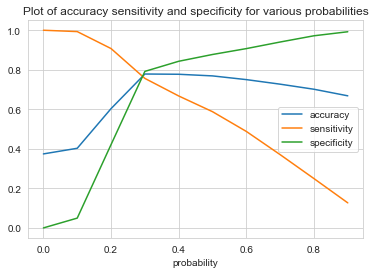

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.title("Plot of accuracy sensitivity and specificity for various probabilities")
plt.show()

### Using Precision-Recall

In [122]:
# precision values, recall values at different thresholds
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Score_prob)

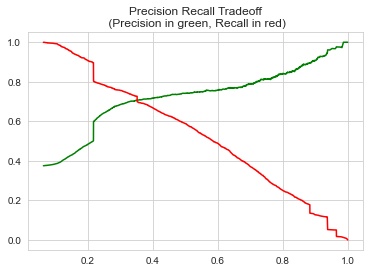

In [123]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Tradeoff\n (Precision in green, Recall in red)')
plt.show()

## Step 7: Making predictions and Calculating Evaluation Metrics on the train data

In [124]:
# applying the cutoff to the test data
y_train_pred_final['final_predicted'] = y_train_pred_final.Score_prob.map(lambda x: 1 if x > 0.24 else 0) 
y_train_pred_final.head()

,Converted,Score_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
892,1,0.921759,892,1,1,1,1,1,1,1,1,1,1,1,1
1819,1,0.489132,1819,0,1,1,1,1,1,0,0,0,0,0,1
4806,0,0.225701,4806,0,1,1,1,0,0,0,0,0,0,0,0
8535,0,0.088102,8535,0,1,0,0,0,0,0,0,0,0,0,0
7842,0,0.682363,7842,1,1,1,1,1,1,1,1,0,0,0,1


In [125]:
# Checking the Metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print("ON THE TRAIN DATA\n")
print("Confusion matrix\n", confusion)

# creating variables
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# defining metrics
accuracy =  metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
fpr = FP/ float(TN+FP)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
precision = TP/ float(TP+FP)
recall = TP/ float(TP+FN)

# printing results
print("\nAccuracy",accuracy.round(2))
print("Sensitivity", sensitivity.round(2))
print("Specificity", specificity.round(2))
print("\nFalse Postive Rate", fpr.round(2))
print("Positive Predictive Value", ppv.round(2))
print("Negative predictive value", npv.round(2))
print("\nPrecision", precision.round(2))
print("Recall", recall.round(2))

ON THE TRAIN DATA

Confusion matrix
 [[2851 1079]
 [ 497 1855]]

Accuracy 0.77
Sensitivity 0.79
Specificity 0.73

False Postive Rate 0.27
Positive Predictive Value 0.63
Negative predictive value 0.85

Precision 0.63
Recall 0.79


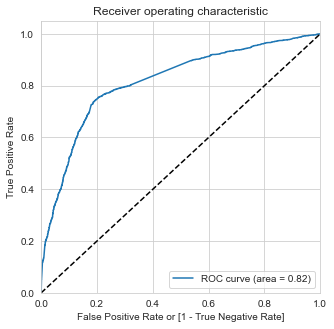

In [126]:
# plotting the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Score_prob, 
                                         drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Score_prob)

## Step 8: Making predictions on the test set and Evaluating Metrics

In [127]:
# scaling test set
X_test[['TotalVisits', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website']])

In [128]:
# viewing X_test
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Specialization_Finance Management
1340,-0.405370,-0.533007,0,1,0,1,0,0,1
9123,-0.405370,-0.347745,0,1,0,0,0,0,0
4966,-0.062633,-0.400939,0,1,0,1,0,0,0
5906,-0.405370,0.475842,0,1,0,0,0,0,1
1299,-1.090843,-0.879684,0,0,1,0,0,1,0


In [129]:
# adding const to test set
X_test_sm = sm.add_constant(X_test)

# predicting on test set using predict function
y_test_pred = res.predict(X_test_sm)

# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [130]:
# viewing the head
y_pred_final.head()

,Converted,Lead Number,0
0,1,1340,0.105630
1,0,9123,0.174301
2,0,4966,0.221905
3,0,5906,0.215038
4,1,1299,0.936212


In [131]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Score_prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Score_prob'],axis=1)

In [132]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Score_prob
0,1340,1,0.105630
1,9123,0,0.174301
2,4966,0,0.221905
3,5906,0,0.215038
4,1299,1,0.936212


#### Applying the Cut-off and Checking the Metrics

In [133]:
y_pred_final['final_predicted'] = y_pred_final.Score_prob.map(lambda x: 1 if x > 0.24 else 0)

In [134]:
y_pred_final.head()

,Lead Number,Converted,Score_prob,final_predicted
0,1340,1,0.105630,0
1,9123,0,0.174301,0
2,4966,0,0.221905,0
3,5906,0,0.215038,0
4,1299,1,0.936212,1


In [135]:
# Checking the Metrics

# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print("ON THE TEST DATA\n")
print("Confusion matrix\n", confusion2)

# creating variables
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# defining metrics
accuracy =  metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
fpr = FP/ float(TN+FP)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
precision = TP/ float(TP+FP)
recall = TP/ float(TP+FN)

# printing results
print("\nAccuracy",accuracy.round(2))
print("Sensitivity", sensitivity.round(2))
print("Specificity", specificity.round(2))
print("\nFalse Postive Rate", fpr.round(2))
print("Positive Predictive Value", ppv.round(2))
print("Negative Predictive Value", npv.round(2))
print("\nPrecision", precision.round(2))
print("Recall", recall.round(2))

ON THE TEST DATA

Confusion matrix
 [[1177  471]
 [ 215  830]]

Accuracy 0.75
Sensitivity 0.79
Specificity 0.71

False Postive Rate 0.29
Positive Predictive Value 0.64
Negative Predictive Value 0.85

Precision 0.64
Recall 0.79


## Step 9: Calculating Lead Score

In [136]:
# creating lead score column
y_pred_final["Lead Score"] = (y_pred_final["Score_prob"]*100).round()
y_pred_final.head()

,Lead Number,Converted,Score_prob,final_predicted,Lead Score
0,1340,1,0.105630,0,11.0
1,9123,0,0.174301,0,17.0
2,4966,0,0.221905,0,22.0
3,5906,0,0.215038,0,22.0
4,1299,1,0.936212,1,94.0


## Step 10: Calculating Lead Conversion Rate

In [137]:
# creating a df to help calculation of rate
rate = y_pred_final.loc[y_pred_final["Converted"] == 1, ['Converted', 'final_predicted']]
rate.head()

,Converted,final_predicted
0,1,0
4,1,1
5,1,1
6,1,1
13,1,1


In [138]:
# Calculating lead conversion rate
r = (sum(rate.final_predicted)/len(rate))*100
print(round(r,2), "%")

79.43 %


In [139]:
# viewing the parameters of the final model
res.params

const                                  0.923328
TotalVisits                            0.180126
Total Time Spent on Website            1.130605
Lead Origin_API                       -1.625449
Lead Origin_Landing Page Submission   -2.012592
Lead Origin_Lead Add Form              4.228037
Lead Source_Google                     0.299251
Lead Source_Olark Chat                 1.279204
Lead Source_Reference                 -1.274022
Specialization_Finance Management     -0.670529
dtype: float64

In [140]:
# Lead Score assigned to every lead as: the conversion probability (Score_prob column) * 100
# Leads with calculated Lead Score greater than 24 (or conversion probability > 0.24) to be considered 'Hot Leads'
# The lead conversion rate after applying the final model was calculated as 79.43
# The three most important metrics obtained from the model were : Lead Origin (Lead Add Form), 
# Lead Origin (Landing Page Submission), Lead Origin (API) - negative effect